In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

# Load

In [2]:
df_train = pd.read_csv('data/application_train.csv')

In [3]:
df_test = pd.read_csv('data/application_test.csv')

In [4]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def perc_null(col):
    '''
    Makes a pretty print out of the percent of null values in each column
    '''
    print('\n', '-' * 50, '\n', col, '\n')
    train_null = len(df_train[df_train[col].isnull()])
    test_null = len(df_test[df_test[col].isnull()])
    if train_null == 0:
        print('Train: 0')
    else:
        print('Train: ', train_null)
        print(round(train_null/len(df_train), 3))
    if test_null == 0:
        print('Test: 0')
    else:
        print('Test: ', test_null)
        print(round(test_null/len(df_test), 3))

In [6]:
for col in df_train.columns.tolist()[2:]:
    perc_null(col)


 -------------------------------------------------- 
 NAME_CONTRACT_TYPE 

Train: 0
Test: 0

 -------------------------------------------------- 
 CODE_GENDER 

Train: 0
Test: 0

 -------------------------------------------------- 
 FLAG_OWN_CAR 

Train: 0
Test: 0

 -------------------------------------------------- 
 FLAG_OWN_REALTY 

Train: 0
Test: 0

 -------------------------------------------------- 
 CNT_CHILDREN 

Train: 0
Test: 0

 -------------------------------------------------- 
 AMT_INCOME_TOTAL 

Train: 0
Test: 0

 -------------------------------------------------- 
 AMT_CREDIT 

Train: 0
Test: 0

 -------------------------------------------------- 
 AMT_ANNUITY 

Train:  12
0.0
Test:  24
0.0

 -------------------------------------------------- 
 AMT_GOODS_PRICE 

Train:  278
0.001
Test: 0

 -------------------------------------------------- 
 NAME_TYPE_SUITE 

Train:  1292
0.004
Test:  911
0.019

 -------------------------------------------------- 
 NAME_INCOME_TYPE 

T

Train:  210199
0.684
Test:  32780
0.672

 -------------------------------------------------- 
 LIVINGAREA_MEDI 

Train:  154350
0.502
Test:  23552
0.483

 -------------------------------------------------- 
 NONLIVINGAPARTMENTS_MEDI 

Train:  213514
0.694
Test:  33347
0.684

 -------------------------------------------------- 
 NONLIVINGAREA_MEDI 

Train:  169682
0.552
Test:  26084
0.535

 -------------------------------------------------- 
 FONDKAPREMONT_MODE 

Train:  210295
0.684
Test:  32797
0.673

 -------------------------------------------------- 
 HOUSETYPE_MODE 

Train:  154297
0.502
Test:  23619
0.485

 -------------------------------------------------- 
 TOTALAREA_MODE 

Train:  148431
0.483
Test:  22624
0.464

 -------------------------------------------------- 
 WALLSMATERIAL_MODE 

Train:  156341
0.508
Test:  23893
0.49

 -------------------------------------------------- 
 EMERGENCYSTATE_MODE 

Train:  145755
0.474
Test:  22209
0.456

 -----------------------------------

# Random EDA Workspace

Percent of defaults in training df

In [7]:
round(len(df_train[df_train['TARGET'] == 1])/len(df_train), 4)

0.0807

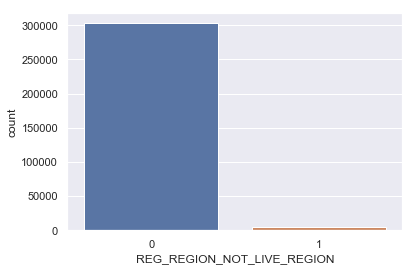

In [8]:
sns.countplot(df_train['REG_REGION_NOT_LIVE_REGION'])

In [9]:
temp = df_train[df_train['REGION_RATING_CLIENT_W_CITY'] == 3]

In [10]:
len(temp[temp['TARGET'] == 1])/len(temp)

0.1140218878248974

# Drop Columns Testing

In [11]:
temp_train = df_train.copy()
temp_train.columns = [col.lower() for col in temp_train.columns]
temp_train.drop(temp_train.columns[range(44, 91)], inplace=True, axis=1)

temp_test = df_test.copy()
temp_test.columns = [col.lower() for col in temp_test.columns]
temp_test.drop(temp_test.columns[range(43, 90)], inplace=True, axis=1)

In [12]:
drop_cols = [
    'weekday_appr_process_start',
    'amt_req_credit_bureau_hour',
    'amt_req_credit_bureau_week',
    'amt_req_credit_bureau_mon',
    'amt_req_credit_bureau_year',
]

for col in drop_cols:
    temp_train.drop(col, inplace=True, axis=1)
    temp_test.drop(col, inplace=True, axis=1)

There should only be 70 columns now in the train and 69 in the test, down from 122/121

In [13]:
print(temp_train.shape)
print(temp_test.shape)

(307511, 70)
(48744, 69)


# Clean and Bin

Impute a few values and turn strings into 1 and 0's. Just this simple stuff here.

## Gender

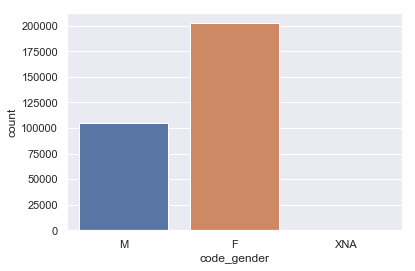

In [14]:
np.unique(temp_train['code_gender'])
sns.countplot(temp_train['code_gender'])

In [15]:
idxs = temp_train[temp_train['code_gender'] == 'XNA'].index

for idx in idxs:
    temp_train.at[idx, 'code_gender'] = 'F'
np.unique(temp_train['code_gender'])

array(['F', 'M'], dtype=object)

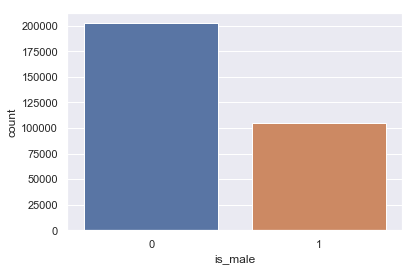

In [16]:
foo = lambda x: 1 if x == 'M' else 0
temp_train['code_gender'] = temp_train['code_gender'].apply(foo)
temp_train.rename(columns={'code_gender': 'is_male'}, inplace=True)
temp_test.rename(columns={'code_gender': 'is_male'}, inplace=True)
sns.countplot(temp_train['is_male'])

## Car

['N' 'Y']


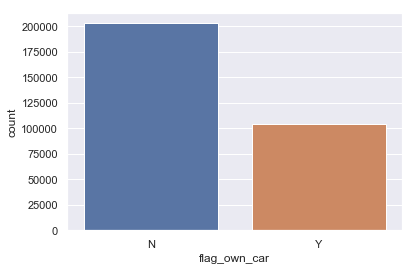

In [17]:
print(np.unique(temp_train['flag_own_car']))
sns.countplot(temp_train['flag_own_car'])

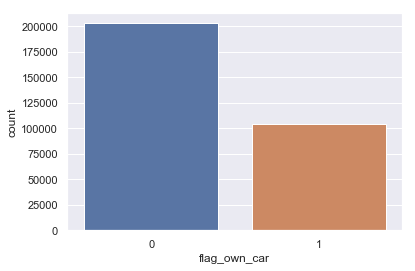

In [18]:
foo = lambda x: 1 if x == 'Y' else 0
temp_train['flag_own_car'] = temp_train['flag_own_car'].apply(foo)
sns.countplot(temp_train['flag_own_car'])

## Realty

['N' 'Y']


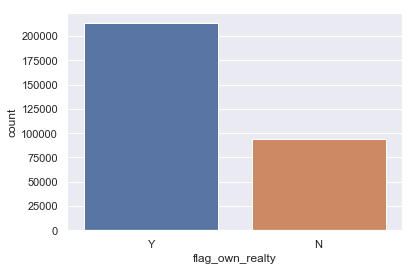

In [19]:
print(np.unique(temp_train['flag_own_realty']))
sns.countplot(temp_train['flag_own_realty'])

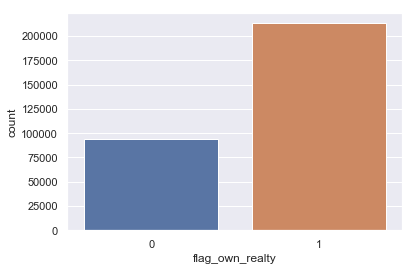

In [20]:
foo = lambda x: 1 if x == 'Y' else 0
temp_train['flag_own_realty'] = temp_train['flag_own_realty'].apply(foo)
sns.countplot(temp_train['flag_own_realty'])

## Amount of Annuity

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


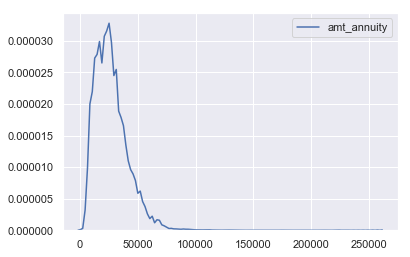

In [21]:
x = temp_train[~temp_train['amt_annuity'].isnull()]['amt_annuity']
sns.kdeplot(x)

In [22]:
median = temp_train['amt_annuity'].median()
print(median)

24903.0


In [23]:
idxs = temp_train[temp_train['amt_annuity'].isnull()]['amt_annuity'].index

for idx in idxs:
    temp_train.at[idx, 'amt_annuity'] = median

idxs = temp_test[temp_test['amt_annuity'].isnull()]['amt_annuity'].index

for idx in idxs:
    temp_test.at[idx, 'amt_annuity'] = median

## Amount of Good Price

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


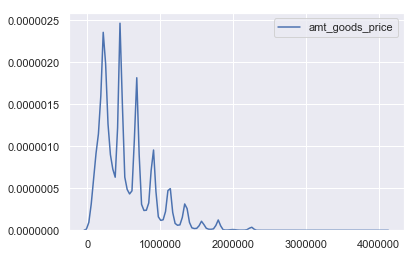

In [24]:
x = temp_train[~temp_train['amt_goods_price'].isnull()]['amt_goods_price']
sns.kdeplot(x)

In [25]:
median = temp_train['amt_goods_price'].median()
print(median)

450000.0


In [26]:
idxs = temp_train[temp_train['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    temp_train.at[idx, 'amt_goods_price'] = median

idxs = temp_test[temp_test['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    temp_test.at[idx, 'amt_goods_price'] = median

## Count of Family Members

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


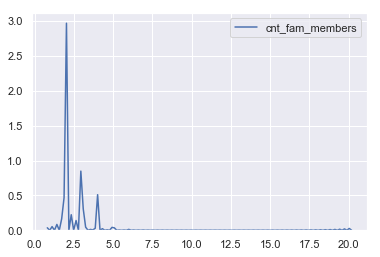

In [27]:
x = temp_train[~temp_train['cnt_fam_members'].isnull()]['cnt_fam_members']
sns.kdeplot(x)

In [28]:
mode = stats.mode(temp_train['cnt_fam_members'])[0][0]
print(mode)

2.0


In [29]:
idxs = temp_train[temp_train['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    temp_train.at[idx, 'amt_goods_price'] = mode

idxs = temp_test[temp_test['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    temp_test.at[idx, 'amt_goods_price'] = mode

## Region Rating Client

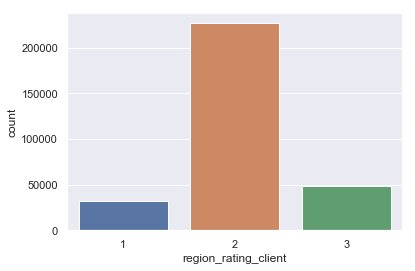

In [30]:
sns.countplot(temp_train['region_rating_client'])

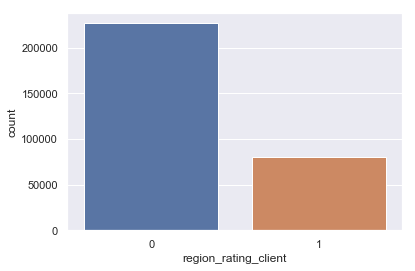

In [31]:
foo = lambda x: 1 if x != 2 else 0
temp_train['region_rating_client'] = temp_train['region_rating_client'].apply(foo)
temp_test['region_rating_client'] = temp_test['region_rating_client'].apply(foo)
sns.countplot(temp_train['region_rating_client'])

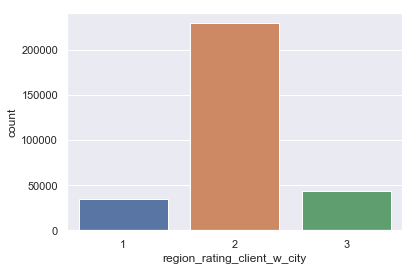

In [32]:
sns.countplot(temp_train['region_rating_client_w_city'])

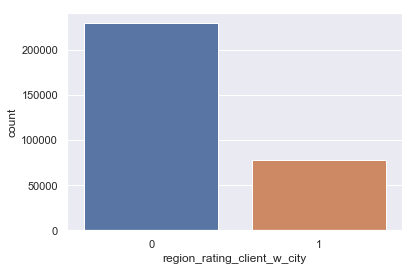

In [33]:
foo = lambda x: 1 if x != 2 else 0
temp_train['region_rating_client_w_city'] = temp_train['region_rating_client_w_city'].apply(foo)
temp_test['region_rating_client_w_city'] = temp_test['region_rating_client_w_city'].apply(foo)
sns.countplot(temp_train['region_rating_client_w_city'])

In [34]:
stats.pearsonr(temp_train['region_rating_client'], temp_train['region_rating_client_w_city'])

(0.9577651060969266, 0.0)

Drop the /w city, too strongly correlated.

## Hour Appr Process Start

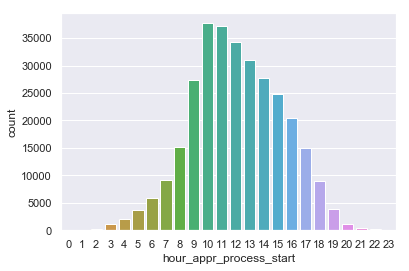

In [35]:
sns.countplot(temp_train['hour_appr_process_start'])

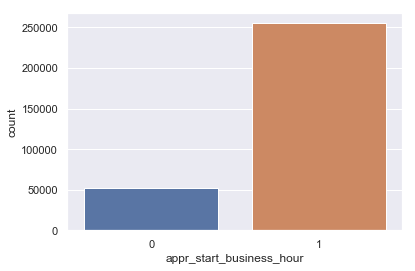

In [36]:
foo = lambda x: 1 if x in range(9,18) else 0
temp_train['hour_appr_process_start'] = temp_train['hour_appr_process_start'].apply(foo)
temp_test['hour_appr_process_start'] = temp_test['hour_appr_process_start'].apply(foo)
temp_train.rename(columns={'hour_appr_process_start': 'appr_start_business_hour'}, inplace=True)
temp_test.rename(columns={'hour_appr_process_start': 'appr_start_business_hour'}, inplace=True)
sns.countplot(temp_train['appr_start_business_hour'])

## EXT Source 2

## OBS 30 CNT Social Circle

## DEF 30 CNT Social Circle

## OBS 60 CNT Social Circle

## DEF 60 CNT Social Circle

## Days Last Phone Change